In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_csv("Online Sales Data (1).csv")
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [26]:
df.shape

(240, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [28]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


<Axes: >

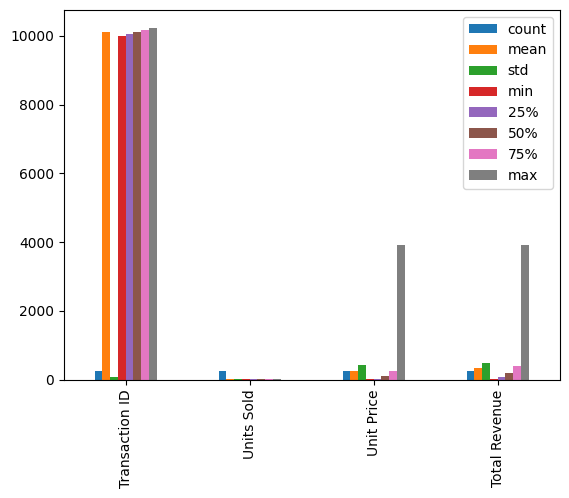

In [29]:
df.describe().T.plot(kind='bar')


In [30]:
df.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.columns.tolist()

['Transaction ID',
 'Date',
 'Product Category',
 'Product Name',
 'Units Sold',
 'Unit Price',
 'Total Revenue',
 'Region',
 'Payment Method']

In [45]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [46]:
df['Product Name'].nunique()

232

In [47]:
Product_count= df['Product Category'].value_counts()
Product_count

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

<Axes: ylabel='count'>

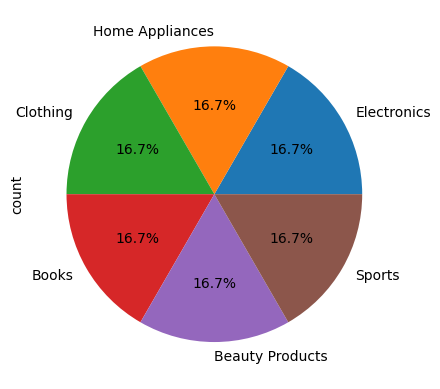

In [48]:
Product_count.plot(kind='pie', autopct='%1.1f%%')

In [49]:
unity=df.groupby(['Product Name', 'Units Sold']).size()
unity

Product Name                                        Units Sold
1984 by George Orwell                               4             1
Adidas 3-Stripes Shorts                             5             1
Adidas Essential Track Pants                        3             1
Adidas FIFA World Cup Football                      3             1
Adidas Originals Superstar Sneakers                 4             1
                                                                 ..
Yeti Tundra Haul Portable Wheeled Cooler            1             1
Youth to the People Superfood Antioxidant Cleanser  1             1
Zara Summer Dress                                   3             1
iPhone 14 Pro                                       2             1
iRobot Braava Jet M6                                1             1
Length: 239, dtype: int64

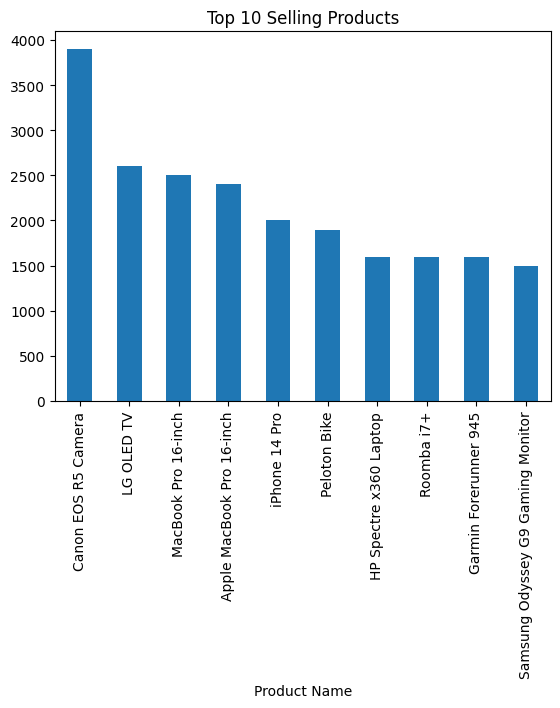

In [50]:
# Top-selling products within each category
top_selling_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.show()

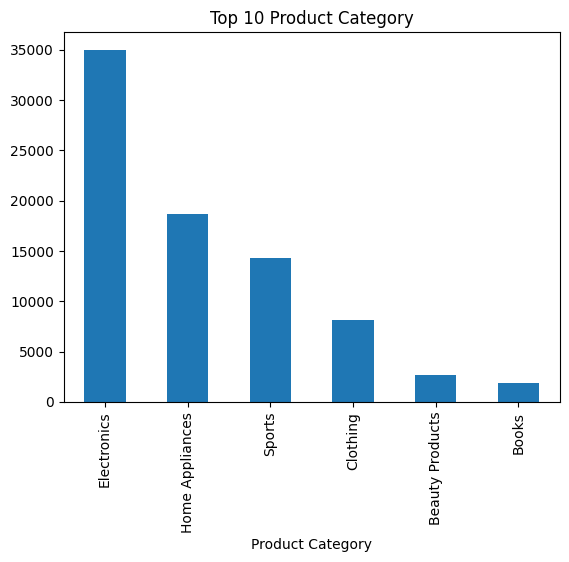

In [51]:
# Top-selling products within each category
top_selling_products = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top 10 Product Category')
plt.show()

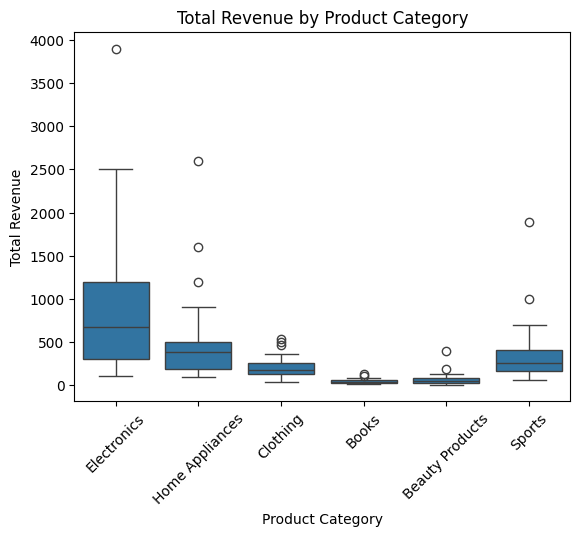

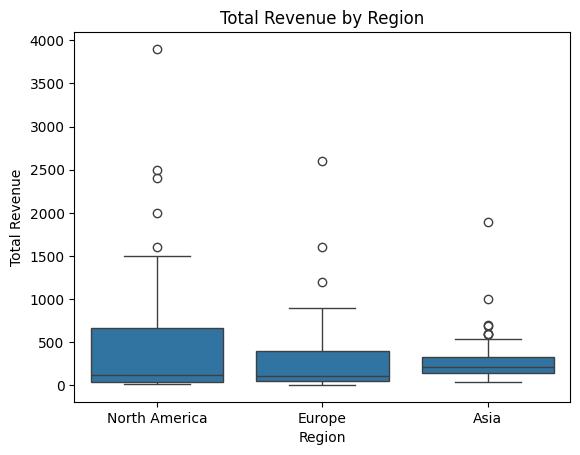

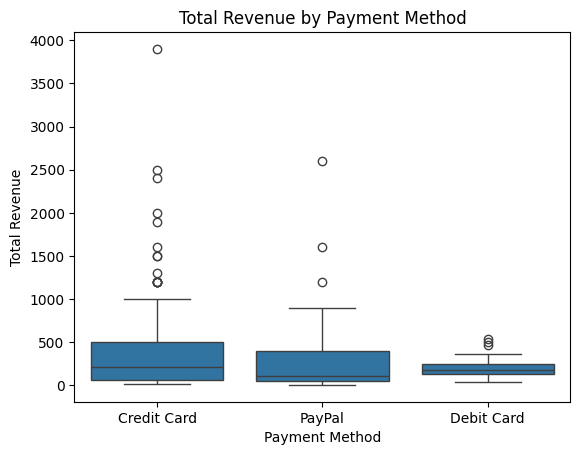

In [52]:
sns.boxplot(x='Product Category', y='Total Revenue', data=df)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

# Total Revenue by Region
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Total Revenue by Region')
plt.show()

# Total Revenue by Payment Method
sns.boxplot(x='Payment Method', y='Total Revenue', data=df)
plt.title('Total Revenue by Payment Method')
plt.show()

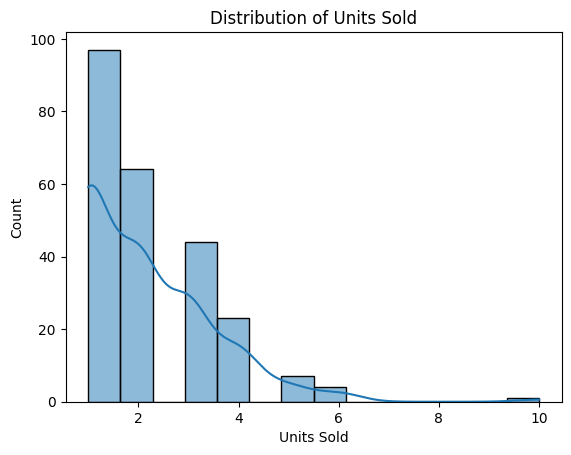

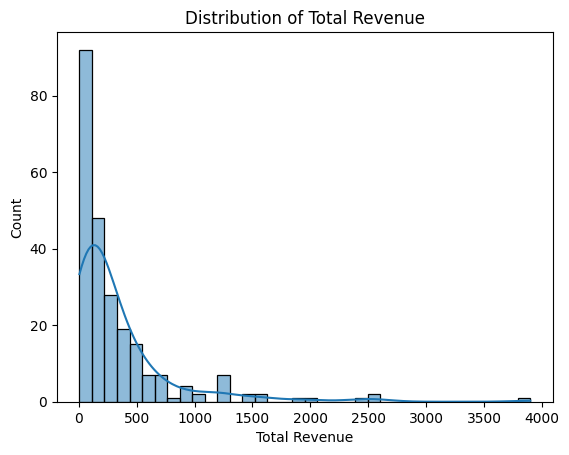

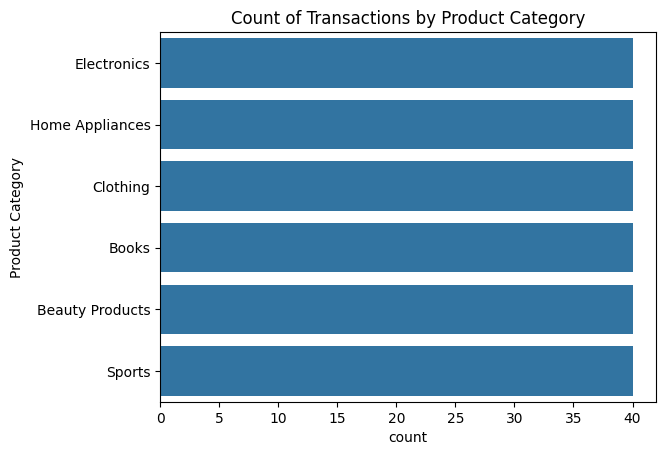

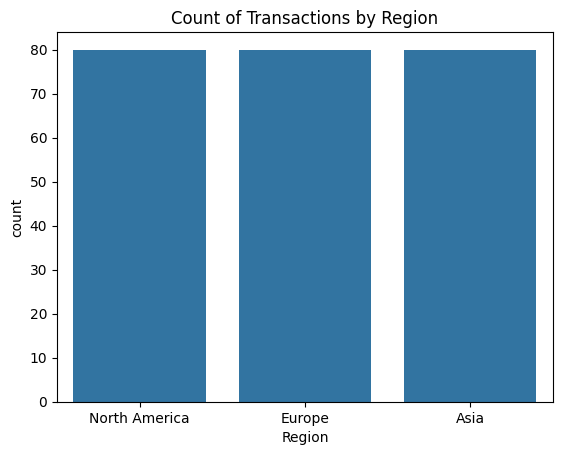

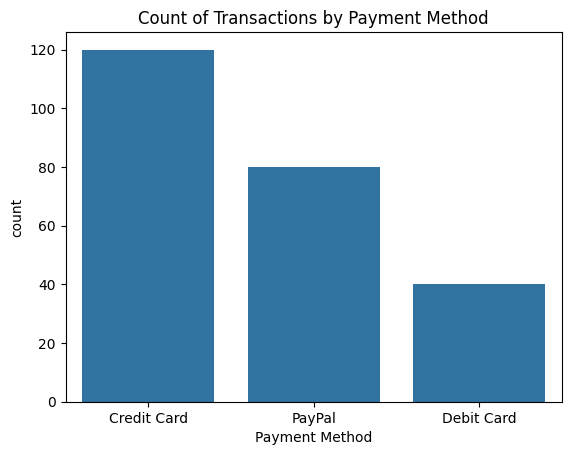

In [53]:
# Distribution of Units Sold
sns.histplot(df['Units Sold'], kde=True)
plt.title('Distribution of Units Sold')
plt.show()

# Distribution of Total Revenue
sns.histplot(df['Total Revenue'], kde=True)
plt.title('Distribution of Total Revenue')
plt.show()

# Count of Transactions by Product Category
sns.countplot(y='Product Category', data=df)
plt.title('Count of Transactions by Product Category')
plt.show()

# Count of Transactions by Region
sns.countplot(x='Region', data=df)
plt.title('Count of Transactions by Region')
plt.show()

# Count of Transactions by Payment Method
sns.countplot(x='Payment Method', data=df)
plt.title('Count of Transactions by Payment Method')
plt.show()


In [54]:
# #CONCLUSION
#  The online sales data provides a comprehensive understanding of customer behavior, sales trends, and market dynamics
# - Top-selling products and categories
# - Customer purchasing habits and preferences
# - Seller performance and ratings
# - Seasonal trends and sales patterns
# - Regional sales distribution

# These findings enable businesses to:

# - Optimize product offerings and pricing strategies
# - Enhance customer satisfact
